Dataset ini biasanya digunakan untuk **memprediksi biaya asuransi berdasarkan sejumlah fitur lainnya**. Ini adalah contoh dataset yang umumnya digunakan dalam analisis data, sehingga deskripsi berikut mungkin mencakup beberapa aspek umum dari dataset ini:

1. Kolom Data: Dataset ini biasanya terdiri dari beberapa kolom yang mewakili
berbagai atribut atau fitur. Beberapa kolom umum yang biasanya ada dalam dataset asuransi mencakup:

- **age**: Usia.
- **sex**: Jenis kelamin.
- **bmi**: Indeks Massa Tubuh (BMI).
- **children**: Jumlah anak/anak-anak dalam tanggungan.
- **smoker**: Status perokok.
- **region**: Wilayah tempat tinggal atau terdaftar.
- **charges**: Biaya asuransi yang dibayarkan.

Tujuan Analisis: Tujuan umum dari analisis dataset ini adalah untuk memahami faktor-faktor apa yang mempengaruhi biaya asuransi (charges) dan apakah kita dapat memprediksi biaya asuransi berdasarkan atribut-atribut lainnya seperti usia, jenis kelamin, BMI, jumlah anak, status perokok, dan wilayah tempat tinggal.

1. Tipe Data: Sebagian besar kolom dalam dataset ini termasuk data numerik seperti usia (age), BMI, jumlah anak (children), dan biaya asuransi (charges). Namun, kolom 'sex', 'smoker', dan 'region' adalah kolom kategorikal yang biasanya mengandung data dalam bentuk teks atau kategori.

2. Potensi Insight: Analisis data pada dataset ini dapat menghasilkan beberapa wawasan, seperti pengaruh usia, status perokok, atau BMI terhadap biaya asuransi. Anda juga dapat melakukan regresi untuk memprediksi biaya asuransi berdasarkan atribut-atribut ini.

3. Machine Learning: Dataset ini sering digunakan dalam proyek pembelajaran mesin, seperti regresi linier untuk memprediksi biaya asuransi atau klasifikasi untuk memprediksi apakah seseorang adalah perokok atau bukan.

4. Visualisasi: Anda dapat menggunakan visualisasi data seperti scatter plot, box plot, histogram, dan lainnya untuk memahami hubungan antara variabel dalam dataset ini.

5. Praktik Bisnis: Data kasus nyata yang sering digunakan dalam industri asuransi untuk penilaian risiko dan penetapan premi. Analisis data ini dapat membantu perusahaan asuransi dalam pengambilan keputusan yang lebih baik dan pemahaman terhadap pelanggan.

##Import Library##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load Dataset##

In [ ]:
# Load data
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


# Exploratory Data Analysis

In [ ]:
# Cek tipe data
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Cek dimensi data
data.shape

(1338, 7)

Dataset kita mempunyai 7 kolom dan 1338 baris

In [ ]:
# Cek statistik deskriptif data
data.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


##Cek Missing Value dan Data Duplikat##

In [ ]:
# cek missing value
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tidak ada nilai kosong dalam dataset

In [ ]:
# Cek data duplikat
data.duplicated().sum()

1

Terdapat 1 data duplikat dalam dataset kita, maka kita akan menghapusnya

In [ ]:
# drop data duplikat
data.drop_duplicates(inplace=True)

In [ ]:
# Cek data unik di kolom region
region = data['region'].unique()
print(region)

['southwest' 'southeast' 'northwest' 'northeast']


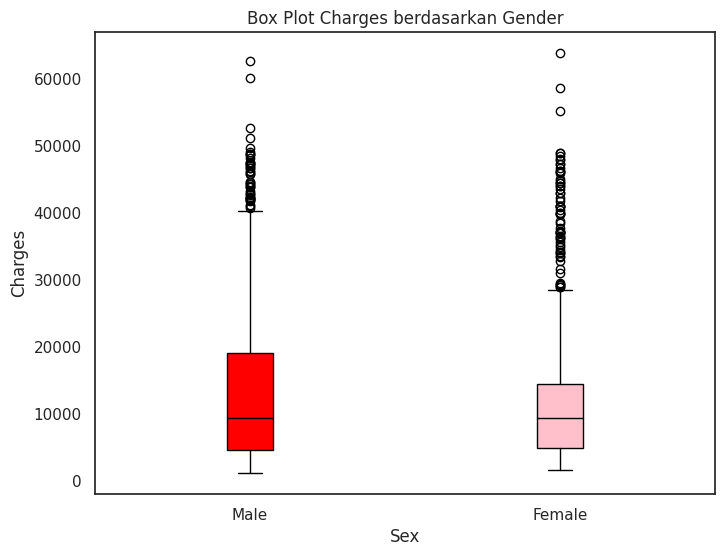

In [ ]:
# Membuat boxplot
plt.figure(figsize=(8, 6))

# Menggunakan boxplot untuk memvisualisasikan distribusi charges berdasarkan gender
boxplot = plt.boxplot([data[data['sex'] == 'male']['charges'], data[data['sex'] == 'female']['charges']],
            labels=['Male', 'Female'], patch_artist=True)

# Menentukan warna kotak dan whisker
colors = ['red', 'pink']

for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Menentukan warna median line
for median in boxplot['medians']:
    median.set(color='black')

plt.title('Box Plot Charges berdasarkan Gender')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

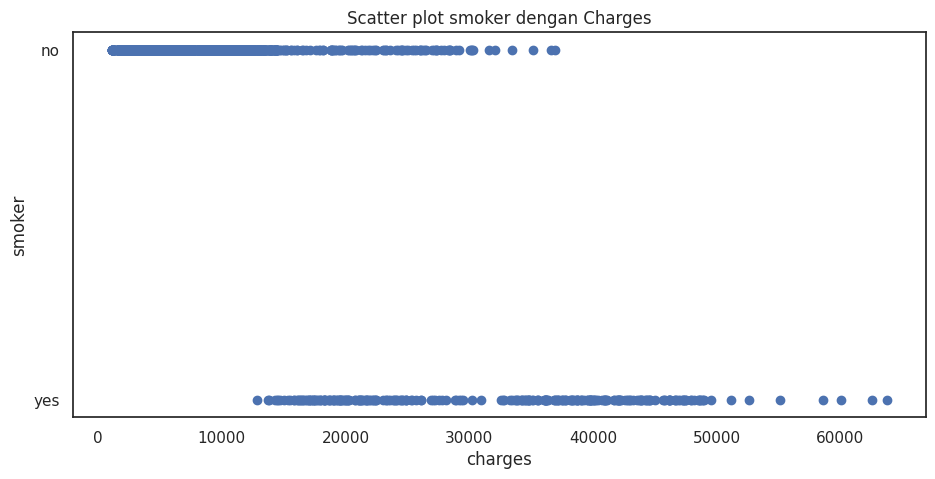

In [ ]:
# Visualisasi korelasi smoker dengan charges menggunakan scatter plot
plt.figure(1, figsize=(11, 5))
plt.title('Scatter plot smoker dengan Charges', fontsize=12)
plt.xlabel('charges')
plt.ylabel('smoker')
plt.scatter(x=data['charges'], y=data['smoker'])
plt.show()

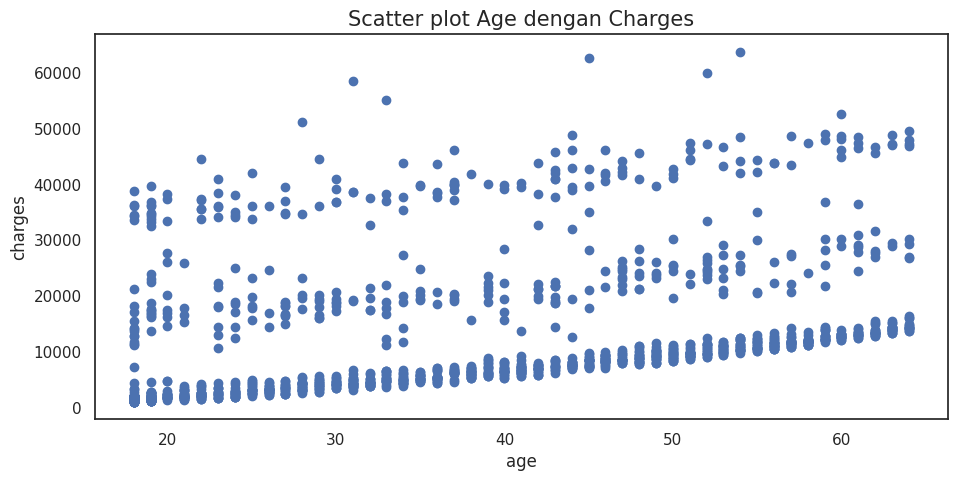

In [ ]:
# Visualisasi korelasi umur dengan charges menggunakan scatter plot
plt.figure(1, figsize=(11, 5))
plt.title('Scatter plot Age dengan Charges', fontsize=15)
plt.xlabel('age')
plt.ylabel('charges')
plt.scatter(x=data['age'], y=data['charges'])
plt.show()

Dapat disimpulkan bahwa semakin tinggi umur ( age ) maka charges semakin tinggi juga

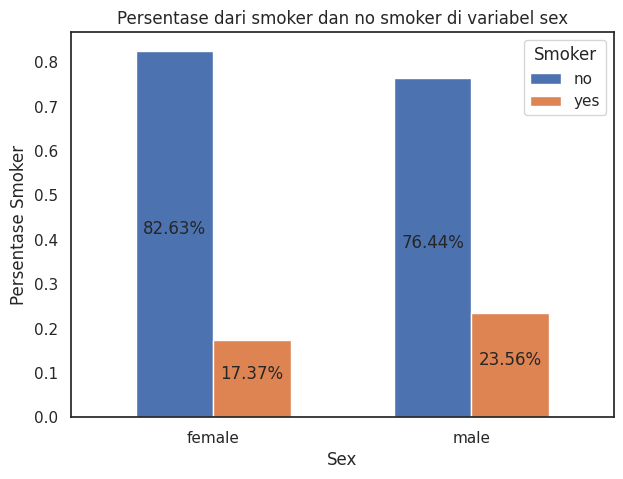

In [ ]:
# Mencari Persentase status smoker di kolom sex
sns.set(style="white")

# Menghitung kemunculan smoker dan no smoker berdasarkan jenis kelamin
smoker_counts = data.groupby(['sex', 'smoker']).size().unstack()

# Kalkulasi Persentase
smoker_percentages = smoker_counts.div(smoker_counts.sum(axis=1), axis=0)

# Plot bar chart
ax = smoker_percentages.plot(kind='bar', figsize=(7, 5), width=0.6)

# Tambahkan label dan Title
plt.title("Persentase dari smoker dan no smoker di variabel sex")
plt.ylabel("Persentase Smoker")
plt.xlabel("Sex")

# Menambahkan label persentase pada setiap bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width / 2, y + height / 2), ha='center')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.legend(title='Smoker', bbox_to_anchor=(1, 1))
plt.show()

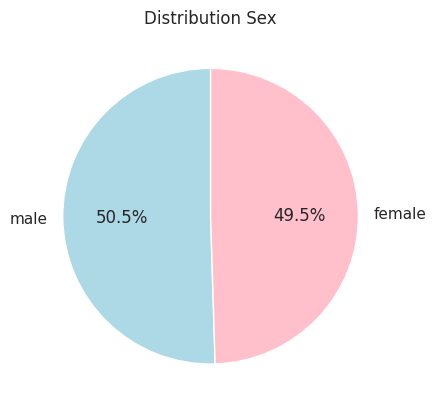

In [ ]:
# Distribusi dari kolom Sex
counts = data['sex'].value_counts()
labels = counts.index
values = counts.values
colors = ['lightblue', 'pink']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution Sex')
plt.show()

<Axes: xlabel='bmi'>

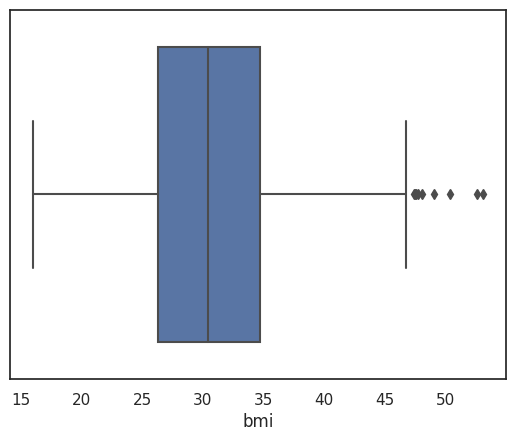

In [ ]:
# Box Plot BMI
sns.boxplot(x = data['bmi'])

<Axes: xlabel='children'>

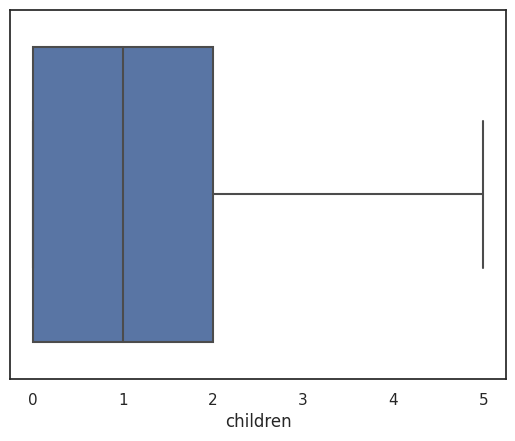

In [ ]:
# Box Plot Children
sns.boxplot(x = data['children'])

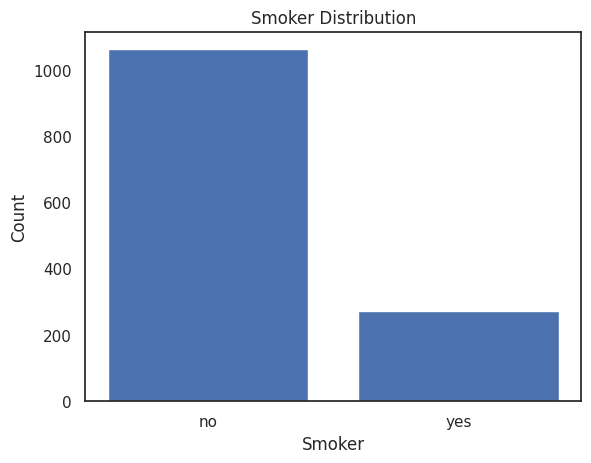

In [ ]:
# Distribusi Kolom Smoker
counts = data['smoker'].value_counts()
labels = counts.index
values = counts.values
plt.bar(labels, values)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

Terdapat data Imbalance di kolom smokers

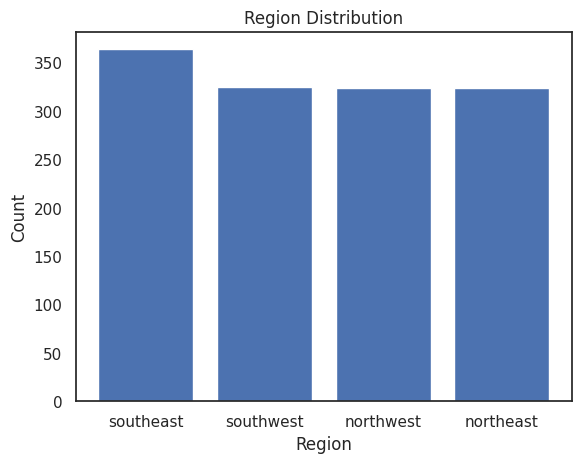

In [ ]:
# distribusi kolom Region
counts = data['region'].value_counts()
labels = counts.index
values = counts.values
plt.bar(labels, values)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='charges'>

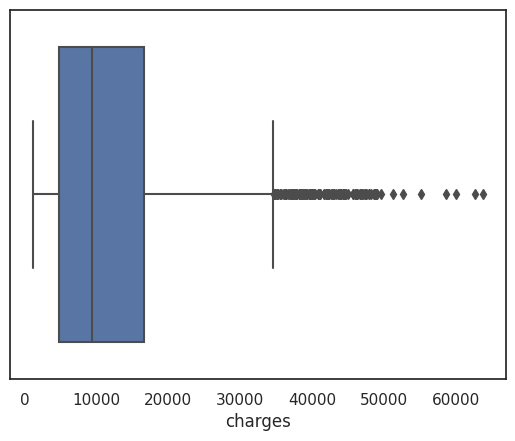

In [ ]:
# Box Plot Charges
sns.boxplot(x = data['charges'])

Banyak data outlier di kolom charges

# Feature Engineering##

##Handling Data Outliers##

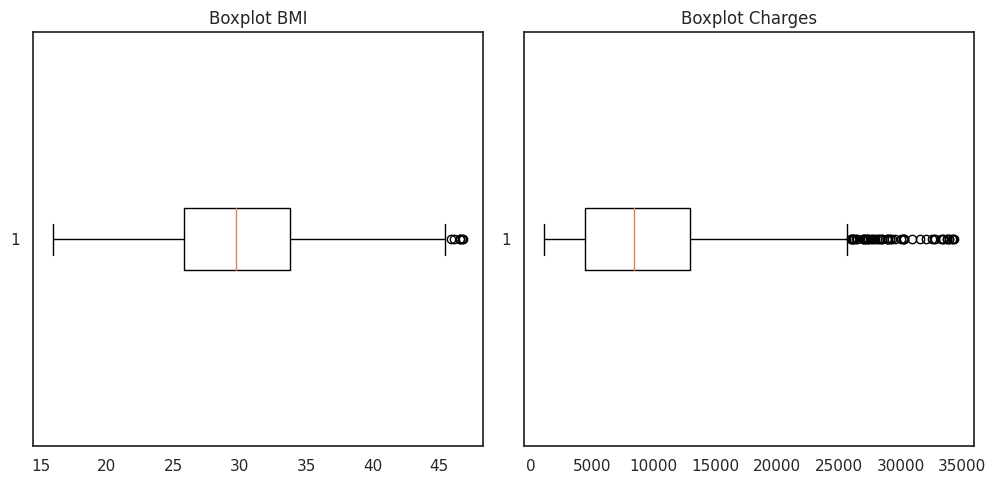

In [ ]:
# Menghitung nilai Q1 (kuartil 25) dan Q3 (kuartil 75)
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)

# Menghitung rentang IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan nilai NaN
data['bmi'] = np.where((data['bmi'] < lower_bound) | (data['bmi'] > upper_bound), np.nan, data['bmi'])

# Menghapus baris yang mengandung nilai NaN
data.dropna(subset=['bmi'], inplace=True)

# Mengulangi proses yang sama untuk kolom "charges"
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['charges'] = np.where((data['charges'] < lower_bound) | (data['charges'] > upper_bound), np.nan, data['charges'])
data.dropna(subset=['charges'], inplace=True)

# Visualisasi hasil penghapusan data outlier
plt.figure(figsize=(10, 5))

# Visualisasi BMI
plt.subplot(1, 2, 1)
plt.boxplot(data['bmi'], vert=False)
plt.title('Boxplot BMI')

# Visualisasi Charges
plt.subplot(1, 2, 2)
plt.boxplot(data['charges'], vert=False)
plt.title('Boxplot Charges')

plt.tight_layout()
plt.show()

##Encoding Data Categorical

In [ ]:
# Menggunakan One Hot Encoding untuk mengubah nilai kategorikal "sex" dan "region"
data = pd.get_dummies(data, columns=['sex','region'], drop_first=True)
print(data)

      age   bmi  children smoker  charges  sex_male  region_northwest  \
0      19 27.90         0    yes 16884.92         0                 0   
1      18 33.77         1     no  1725.55         1                 0   
2      28 33.00         3     no  4449.46         1                 0   
3      33 22.70         0     no 21984.47         1                 1   
4      32 28.88         0     no  3866.86         1                 1   
...   ...   ...       ...    ...      ...       ...               ...   
1333   50 30.97         3     no 10600.55         1                 1   
1334   18 31.92         0     no  2205.98         0                 0   
1335   18 36.85         0     no  1629.83         0                 0   
1336   21 25.80         0     no  2007.94         0                 0   
1337   61 29.07         0    yes 29141.36         0                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1               

In [ ]:
# Mengubah value smoker dari kategorikal menjadi numerik dengan Label Encoder
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah variabel "smoker"
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# Menampilkan data setelah transformasi
print(data)

      age   bmi  children  smoker  charges  sex_male  region_northwest  \
0      19 27.90         0       1 16884.92         0                 0   
1      18 33.77         1       0  1725.55         1                 0   
2      28 33.00         3       0  4449.46         1                 0   
3      33 22.70         0       0 21984.47         1                 1   
4      32 28.88         0       0  3866.86         1                 1   
...   ...   ...       ...     ...      ...       ...               ...   
1333   50 30.97         3       0 10600.55         1                 1   
1334   18 31.92         0       0  2205.98         0                 0   
1335   18 36.85         0       0  1629.83         0                 0   
1336   21 25.80         0       0  2007.94         0                 0   
1337   61 29.07         0       1 29141.36         0                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1   

Alasan menggunakan label encoder adalah karena status perokok dan non perokok mempunyai tingkatan, dimana perokok kesehatannya kurang baik daripada non perokok.

##Matriks Korelasi##

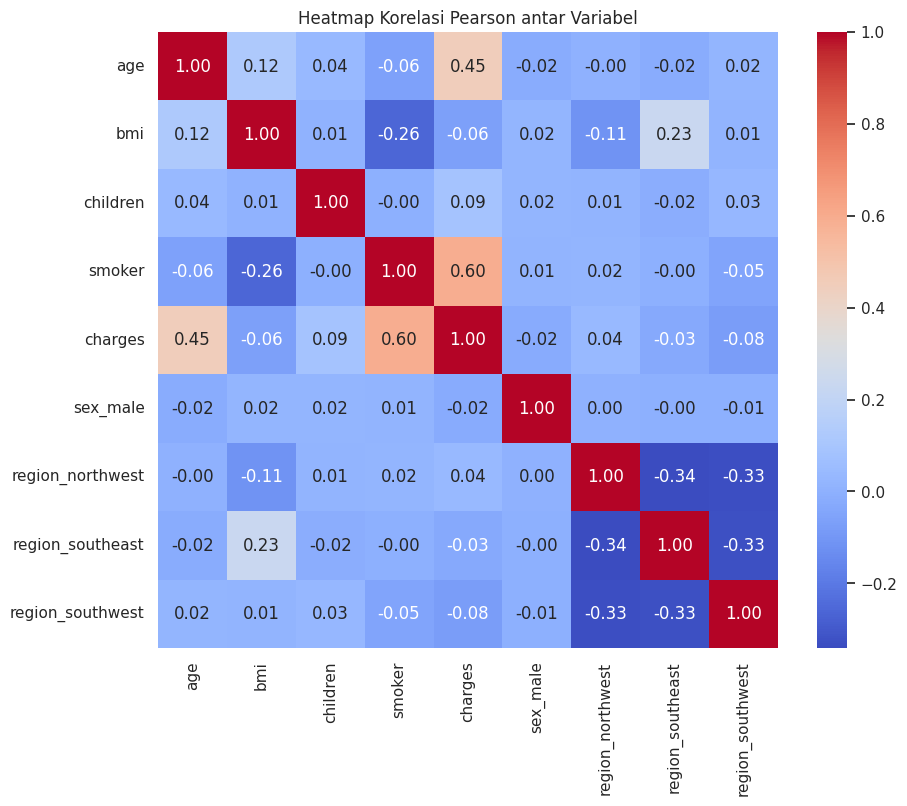

In [ ]:
# Hitung matriks korelasi dengan metode Pearson
correlation_matrix = data.corr(method='pearson')

# Buat heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Pearson antar Variabel")
plt.show()

Dapat dilihat bahwa terdapat 2 variabel yang berkorelasi tinggi dengan charges, yaitu kolom "Age" dan "Smoker"

In [ ]:
# Membuat peringkat korelasi
correlation_matrix = data.corr(method='pearson')
correlation_with_charges = correlation_matrix['charges'].abs().sort_values(ascending=False)
print(correlation_with_charges)

charges            1.00
smoker             0.60
age                0.45
children           0.09
region_southwest   0.08
bmi                0.06
region_northwest   0.04
region_southeast   0.03
sex_male           0.02
Name: charges, dtype: float64


##Standarisasi Data##

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisiliasi StandardScaler
scaler = StandardScaler()

# Standarisasi semua kolom didataframe
data_standardized = scaler.fit_transform(data)

# Reassign nilai standar ke DataFrame asli
data.loc[:,:] = data_standardized

# Menampilkan hasil modifikasi dataframe
data

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,-1.43,-0.36,-0.89,2.78,0.97,-0.98,-0.59,-0.58,1.76
1,-1.50,0.64,-0.07,-0.36,-1.14,1.03,-0.59,1.72,-0.57
2,-0.79,0.51,1.57,-0.36,-0.76,1.03,-0.59,1.72,-0.57
3,-0.43,-1.24,-0.89,-0.36,1.68,1.03,1.71,-0.58,-0.57
4,-0.50,-0.19,-0.89,-0.36,-0.84,1.03,1.71,-0.58,-0.57
...,...,...,...,...,...,...,...,...,...
1333,0.78,0.17,1.57,-0.36,0.10,1.03,1.71,-0.58,-0.57
1334,-1.50,0.33,-0.89,-0.36,-1.07,-0.98,-0.59,-0.58,-0.57
1335,-1.50,1.17,-0.89,-0.36,-1.15,-0.98,-0.59,1.72,-0.57
1336,-1.28,-0.71,-0.89,-0.36,-1.10,-0.98,-0.59,-0.58,1.76


Karena tadi diheatmap hanya 2 variabel yang mempunyai korelasi tertinggi dengan charges, maka variabel tersebut sebagai X dan charges sebagai y.

# Feature Selection

In [ ]:
# Memilih kolom "age" dan "smoker" sebagai fitur (X)
X = data[['age', 'smoker']]

# Memilih kolom "charges" sebagai variabel target (y)
y = data['charges']

In [ ]:
# Memisahkan fitur dan variabel target
#X = data.drop('charges', axis=1)
#y = data['charges']

In [ ]:
X

,age,smoker
0,-1.43,2.78
1,-1.50,-0.36
2,-0.79,-0.36
3,-0.43,-0.36
4,-0.50,-0.36
...,...,...
1333,0.78,-0.36
1334,-1.50,-0.36
1335,-1.50,-0.36
1336,-1.28,-0.36


In [ ]:
y

0       0.97
1      -1.14
2      -0.76
3       1.68
4      -0.84
        ... 
1333    0.10
1334   -1.07
1335   -1.15
1336   -1.10
1337    2.68
Name: charges, Length: 1190, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

# Split data training dan testing 70% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 833 rows
Test Set: 357 rows


Saya menggunakan Lazypredict untuk mempermudah serta menghemat waktu dalam pemilihan model

In [ ]:
# Install library lazypredict
!pip install lazypredict

# Import LazyRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Inisialisasi LazyRegressor
reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Tampilkan hasil
print(models)

100%|██████████| 42/42 [00:03<00:00, 12.62it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 2
[LightGBM] [Info] Start training from score -0.018053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

# Modelling & Evaluasi Model

In [ ]:
# Import library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Membuat Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Membuat Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Membuat model SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

# Membuat model Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# MLP Regressor
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

# Bayesian Ridge Regression
br_model = BayesianRidge()
br_model.fit(X_train, y_train)
br_pred = br_model.predict(X_test)

# Melakuakan Evaluasi model
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"{name} Evaluation:")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}%")
    print("\n")

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest Regressor", y_test, rf_pred)
evaluate_model("SVR", y_test, svr_pred)
evaluate_model("Gradient Boosting Regressor", y_test, gb_pred)
evaluate_model("MLP Regressor", y_test, mlp_pred)
evaluate_model("Bayesian Ridge Regressor", y_test, br_pred)

Linear Regression Evaluation:
R-squared: 0.5410
Mean Squared Error: 0.4363
Root Mean Squared Error: 0.6606
Mean Absolute Error: 0.3823
Mean Absolute Percentage Error: 1.4477%


Random Forest Regressor Evaluation:
R-squared: 0.5252
Mean Squared Error: 0.4514
Root Mean Squared Error: 0.6718
Mean Absolute Error: 0.3887
Mean Absolute Percentage Error: 1.3896%


SVR Evaluation:
R-squared: 0.5324
Mean Squared Error: 0.4446
Root Mean Squared Error: 0.6668
Mean Absolute Error: 0.2934
Mean Absolute Percentage Error: 0.7280%


Gradient Boosting Regressor Evaluation:
R-squared: 0.5364
Mean Squared Error: 0.4407
Root Mean Squared Error: 0.6639
Mean Absolute Error: 0.3791
Mean Absolute Percentage Error: 1.4452%


MLP Regressor Evaluation:
R-squared: 0.5421
Mean Squared Error: 0.4353
Root Mean Squared Error: 0.6598
Mean Absolute Error: 0.3691
Mean Absolute Percentage Error: 1.5919%


Bayesian Ridge Regressor Evaluation:
R-squared: 0.5413
Mean Squared Error: 0.4361
Root Mean Squared Error: 0.6604
Mea

Model MLP Regressor merupakan model yang lebih baik dari model lainnya berdasarkan hasil metriks evaluasi model. Maka kita akan menggunakan model MLP Regressor untuk mencoba test data dengan input data secara manual dan menampilkan hasil prediksinya.

# Uji Hipotesis dengan Z-Score

In [ ]:
from scipy import stats

# Ambil bobot dan bias dari lapisan pertama
age_coef = mlp_model.coefs_[1][0]
smoker_coef = mlp_model.coefs_[1][1]

# Hitung nilai z-score untuk koefisien regresi Age
age_zscore = age_coef / mlp_model.loss_

# Hitung nilai z-score untuk koefisien regresi Smoker
smoker_zscore = smoker_coef / mlp_model.loss_

# Bandingkan dengan nilai critical z, misalnya, 1.96 untuk alpha 5%
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha / 2)

# Uji hipotesis nol
age_hypothesis = abs(age_zscore) > critical_value
smoker_hypothesis = abs(smoker_zscore) > critical_value

print("Uji Hipotesis Variabel Age:", age_hypothesis)
print("Uji Hipotesis Variabel Smoker:", smoker_hypothesis)

Uji Hipotesis Variabel Age: [False]
Uji Hipotesis Variabel Smoker: [False]


Dalam hasil output tersebut, [False] pada kedua uji hipotesis menunjukkan bahwa hipotesis nol tidak dapat ditolak untuk variabel Age dan Smoker.

1. Variabel Age:

False pada "Uji Hipotesis Variabel Age" menunjukkan bahwa nilai z-score untuk koefisien regresi Age tidak melebihi nilai kritis z pada tingkat signifikansi yang dipilih (biasanya 0.05). Oleh karena itu, tidak cukup bukti untuk menyatakan bahwa variabel Age memiliki efek yang signifikan terhadap variabel target dalam model MLP Regressor.

2. Variabel Smoker:

False pada "Uji Hipotesis Variabel Smoker" menunjukkan bahwa nilai z-score untuk koefisien regresi Smoker juga tidak melebihi nilai kritis z pada tingkat signifikansi yang dipilih. Oleh karena itu, tidak cukup bukti untuk menyatakan bahwa variabel Smoker memiliki efek yang signifikan terhadap variabel target dalam model.

Hasil ini dapat diartikan bahwa, berdasarkan analisis uji hipotesis, tidak ada indikasi bahwa variabel Age atau Smoker secara signifikan mempengaruhi variabel target (Charges) dalam model MLP Regressor pada tingkat signifikansi tertentu yang telah dipilih (dalam hal ini, tingkat signifikansi 0.05).

# Testing Model

In [ ]:
import joblib

# Simpan model ke file
joblib.dump(mlp_model, 'mlp_regressor_model.pkl')

['mlp_regressor_model.pkl']

Simpan model MLP Regressor dengan menggunakan library joblib

In [ ]:
# Load model mlp regressor yang disimpan
loaded_model = joblib.load('mlp_regressor_model.pkl')

# Replace value dengan data kita
age = 28 # Umur
status_smoker = 1 # status smoker (0 itu tidak perokok dan 1 adalah perokok)
new_data = np.array([[age, status_smoker]])

# Melakukan prediksi
prediction = loaded_model.predict(new_data)

# Menampilkan hasil prediksi
print("Prediction:", prediction)

Prediction: [12.72445055]


# Saran dan Rekomendasi

Saran dan rekomendasi terkait hasil prediksi asuransi kesehatan dapat membantu perusahaan untuk meningkatkan strategi bisnis mereka. Berikut adalah beberapa saran yang dapat dipertimbangkan:

- **Pricing Strategy** :
Sesuaikan strategi penetapan harga (pricing) untuk produk asuransi kesehatan berdasarkan temuan bahwa charges meningkat seiring dengan bertambahnya usia dan perokok memiliki charges yang lebih tinggi. Ini bisa mencakup menetapkan premi yang lebih tinggi untuk kelompok usia yang lebih tua dan perokok.

- **Segmentasi Pelanggan** :
Lakukan segmentasi pelanggan berdasarkan informasi umur dan status perokok. Kenali dan pahami profil pelanggan yang berbeda untuk dapat menawarkan produk asuransi kesehatan yang lebih sesuai dengan kebutuhan dan kemampuan membayar masing-masing segmen.

- **Campaign** :
Jalankan campaign atau penjualan khusus untuk kelompok yang diidentifikasi sebagai berisiko tinggi, seperti perokok atau kelompok usia tertentu. Tawarkan insentif atau manfaat tambahan untuk menarik perhatian pelanggan dalam segmen ini.

- **Edukasi dan Pencegahan** :
Tingkatkan upaya edukasi dan promosi pencegahan kesehatan, terutama kepada pelanggan yang termasuk dalam kelompok berisiko tinggi. Pencegahan dapat membantu mengurangi klaim dan charges di masa depan.

- **Penilaian Risiko Lebih Lanjut** :
Lakukan analisis lebih lanjut untuk mengevaluasi faktor-faktor risiko lainnya yang mungkin mempengaruhi charges. Hal ini dapat mencakup variabel tambahan seperti riwayat medis atau gaya hidup. Mengetahui faktor-faktor ini dapat meningkatkan akurasi model Anda.

- **Personalisasi Produk** :
Tingkatkan personalisasi produk asuransi kesehatan. Berdasarkan informasi umur dan status perokok, Anda dapat menyusun paket-paket asuransi yang lebih sesuai dengan kebutuhan dan profil risiko masing-masing pelanggan.